# Create Verification Graphs From MODE Output

MODE outputs various different metrics on how a model is performing compared to observations. This file with this information is outputted as with a 'cts.txt' at the end of the file. More information on what the information is and how it is denoted in the text file can be found on the DTC website here: https://dtcenter.org/met-online-tutorial-metv8-0/mode/output.

In [1]:
import glob
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

In [2]:
#arrays of all the forecast hours and reflactivivty objects to get data for.
forecast_hours  = [3, 6, 9, 12, 15, 18, 24, 30, 36]
plot_forecast_hours = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]
dbz = [40, 35, 30, 25]
drt = '/gpfs/fs1/home/ac.jcorner/NIU/Masters_Thesis/metplus/metplus_output/mode_output/'

## Critical Success Index Graph


The Critical Success Index (CSI) is a verification score that compares all correct forecast hits with either misses and false alarms and is denoted below.

$$
CSI = \frac{hits}{hits + misses + false \space alarms}
$$

CSI is used to measure the skill in forecasting. A percent (ratio) close to a hundred (one) indicates good skill with lower numbers showing a lack skill.

In [3]:
#interate through the forecast hours.
for hours in forecast_hours:
    
    #interate through the reflectivty thresholds.
    for thres in range(len(dbz)):
        
        #use locals() to define/create arrarys for each forecast and dBz objects.
        locals()[f"r{dbz[thres]}_f{str(hours).zfill(2)}"] = []
        
        #use glob to get all files that match each forecast and dBz objects.
        for files in glob.glob(f'{drt}mode_{str(hours).zfill(2)}*T{thres+1}_cts.txt'):
            
            #Open the file and append the CSI value.
            df = pd.read_csv(str(files), delim_whitespace=True)
            locals()[f"r{dbz[thres]}_f{str(hours).zfill(2)}"].append(float(df.CSI[1]))
            

In [4]:
#Calculate the average value for each array.
scores40 = np.array([np.average(r40_f03), np.average(r40_f06), np.average(r40_f09), np.average(r40_f12), np.average(r40_f15), np.average(r40_f18), np.average(r40_f24), np.average(r40_f30),np.average(r40_f36)])
scores35 = np.array([np.average(r35_f03), np.average(r35_f06), np.average(r35_f09), np.average(r35_f12), np.average(r35_f15), np.average(r35_f18), np.average(r35_f24), np.average(r35_f30),np.average(r35_f36)])
scores30 = np.array([np.average(r30_f03), np.average(r30_f06), np.average(r30_f09), np.average(r30_f12), np.average(r30_f15), np.average(r30_f18), np.average(r30_f24), np.average(r30_f30),np.average(r30_f36)])
scores25 = np.array([np.average(r25_f03), np.average(r25_f06), np.average(r25_f09), np.average(r25_f12), np.average(r25_f15), np.average(r25_f18), np.average(r25_f24), np.average(r25_f30),np.average(r25_f36)])

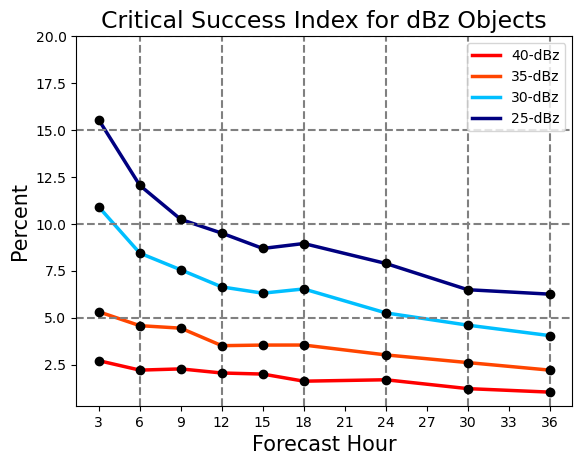

In [5]:
#plot the data!
plt.plot(forecast_hours, scores40, color = 'red', lw=2.5)
plt.plot(forecast_hours, scores35, color = 'orangered', lw=2.5)
plt.plot(forecast_hours, scores30, color = 'deepskyblue', lw=2.5)
plt.plot(forecast_hours, scores25, color = 'navy', lw=2.5)

plt.scatter(forecast_hours, scores40, color ='black',zorder=10)
plt.scatter(forecast_hours, scores35, color ='black',zorder=10)
plt.scatter(forecast_hours, scores30, color ='black',zorder=10)
plt.scatter(forecast_hours, scores25, color ='black',zorder=10)

plt.xticks(ticks = plot_forecast_hours)
plt.yticks(ticks = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2], labels = [2.50, 5.00, 7.50, 10.0, 12.5, 15.0, 17.5, 20.0 ])
plt.xlabel('Forecast Hour', size = 15)
plt.ylabel('Percent', size = 15)

plt.title('Critical Success Index for dBz Objects', size = 17)


plt.axvline(x = 6, color = 'grey', ls='--')
plt.axvline(x = 12, color = 'grey', ls='--')
plt.axvline(x = 18, color = 'grey', ls='--')
plt.axvline(x = 24, color = 'grey', ls='--')
plt.axvline(x = 30, color = 'grey', ls='--')
plt.axvline(x = 36, color = 'grey', ls='--')

plt.axhline(y = 0.05, color = 'grey', ls='--')
plt.axhline(y = 0.1, color = 'grey', ls='--')
plt.axhline(y = 0.15, color = 'grey', ls='--')
plt.axhline(y = 0.2, color = 'grey', ls='--')

plt.legend(['40-dBz', '35-dBz', '30-dBz', '25-dBz'], loc ='upper right')


## Frequency Bias Graph

Frequency bias is the amount of hits and false alarms compared to the amount of hits and misses and is calculated below:

$$
BIAS = \frac{hits + false \space alarms}{hits + misses}
$$

Frequnecy bias shows whether something is overforecasted or underforecasted. A number greater than one indicates overforecasting while a number less than one indicates underforecasting. NOTE: A score of one does not indicate that good skill, but does indicate that there is no bias in over/under-forecasting. 

In [6]:
#interate through the forecast hours.
for hours in forecast_hours:
    
    #interate through the reflectivty thresholds.
    for thres in range(len(dbz)):
        
        #use locals() to define/create arrarys for each forecast and dBz objects.
        locals()[f"r{dbz[thres]}_f{str(hours).zfill(2)}"] = []
        
        #use glob to get all files that match each forecast and dBz objects.
        for files in glob.glob(f'{drt}mode_{str(hours).zfill(2)}*T{thres+1}_cts.txt'):
            
            #Open the file and append the CSI value.
            df = pd.read_csv(str(files), delim_whitespace=True)
            locals()[f"r{dbz[thres]}_f{str(hours).zfill(2)}"].append(float(df.FBIAS[1]))

In [7]:
#Calculate the average value for each array.
scores40 = np.array([np.average(r40_f03), np.average(r40_f06), np.average(r40_f09), np.average(r40_f12), np.average(r40_f15), np.average(r40_f18), np.average(r40_f24), np.average(r40_f30),np.average(r40_f36)])
scores35 = np.array([np.average(r35_f03), np.average(r35_f06), np.average(r35_f09), np.average(r35_f12), np.average(r35_f15), np.average(r35_f18), np.average(r35_f24), np.average(r35_f30),np.average(r35_f36)])
scores30 = np.array([np.average(r30_f03), np.average(r30_f06), np.average(r30_f09), np.average(r30_f12), np.average(r30_f15), np.average(r30_f18), np.average(r30_f24), np.average(r30_f30),np.average(r30_f36)])
scores25 = np.array([np.average(r25_f03), np.average(r25_f06), np.average(r25_f09), np.average(r25_f12), np.average(r25_f15), np.average(r25_f18), np.average(r25_f24), np.average(r25_f30),np.average(r25_f36)])

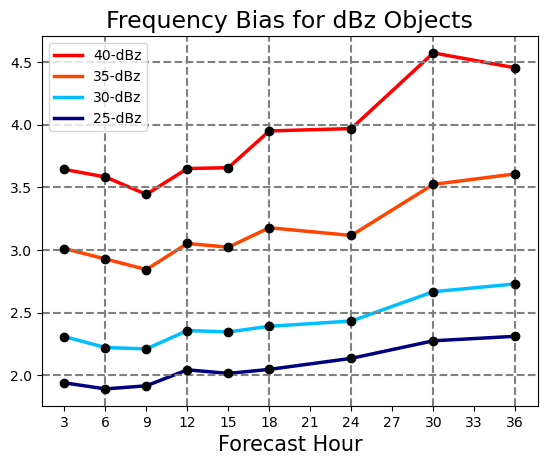

In [8]:
#Plot the data!
plt.plot(forecast_hours, scores40, color = 'red', lw=2.5)
plt.plot(forecast_hours, scores35, color = 'orangered', lw=2.5)
plt.plot(forecast_hours, scores30, color = 'deepskyblue', lw=2.5)
plt.plot(forecast_hours, scores25, color = 'navy', lw=2.5)

plt.scatter(forecast_hours, scores40, color ='black',zorder=10)
plt.scatter(forecast_hours, scores35, color ='black',zorder=10)
plt.scatter(forecast_hours, scores30, color ='black',zorder=10)
plt.scatter(forecast_hours, scores25, color ='black',zorder=10)

plt.xticks(ticks = plot_forecast_hours)
#plt.yticks(ticks = [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
plt.xlabel('Forecast Hour', size = 15)

plt.axvline(x = 6, color = 'grey', ls='--')
plt.axvline(x = 12, color = 'grey', ls='--')
plt.axvline(x = 18, color = 'grey', ls='--')
plt.axvline(x = 24, color = 'grey', ls='--')
plt.axvline(x = 30, color = 'grey', ls='--')
plt.axvline(x = 36, color = 'grey', ls='--')

plt.axhline(y = 2, color = 'grey', ls='--')
plt.axhline(y = 2.5, color = 'grey', ls='--')
plt.axhline(y = 3, color = 'grey', ls='--')
plt.axhline(y = 3.5, color = 'grey', ls='--')
plt.axhline(y = 4, color = 'grey', ls='--')
plt.axhline(y = 4.5, color = 'grey', ls='--')

plt.title('Frequency Bias for dBz Objects',size = 17)
plt.legend(['40-dBz', '35-dBz', '30-dBz', '25-dBz'], loc ='upper left')
